# DatafestAfrica ML Hackathon | Team Wheelers


## Project Description: Help a Financial Industry predict who is likely to complete an E-process application
The IT team has provided historical information containing the information of applicants and the status of their loan application process. You are expected to automate the process by building a machine learning model to predict the outcome of the lending process if the credit facility process was completed via e-process, that is E-Signed or not.

### Setup

In [2]:
#Import Basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("Import Successful; Libraries")

#Import Datasets

trainset = pd.read_csv("Data/train.csv")
testset = pd.read_csv("Data/test.csv")

print("Import Successful; Data")

Import Successful; Libraries
Import Successful; Data


### Data Overview

In [3]:
trainset.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [4]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

In [5]:
trainset.isnull().sum()

Entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
e_signed                0
dtype: int64

In [6]:
trainset.describe()

,Entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.251600e+04,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000,12516.000000
mean,5.599485e+06,43.026766,0.425056,3654.110658,1.191355,3.532998,3.593161,3.402205,3.508469,0.795462,950.251518,61133.401246,0.690665,0.877954,0.582848,0.718456,0.621944,0.621912,6.494088,0.540588
std,2.563354e+06,11.865891,0.494371,1508.072163,2.404529,2.265293,2.749211,2.206649,1.959969,0.403380,706.915146,15396.809340,0.090294,0.054197,0.125260,0.121103,0.139876,0.139623,3.731870,0.498370
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.376885e+06,34.000000,0.000000,2575.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49450.000000,0.641221,0.850893,0.499887,0.635005,0.519794,0.519662,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3255.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699621,0.880993,0.588202,0.725717,0.624081,0.623781,6.000000,1.000000
75%,7.803325e+06,51.000000,1.000000,4661.250000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752053,0.911485,0.672431,0.806576,0.729609,0.728389,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,14.000000,1.000000,10200.000000,99750.000000,0.999997,0.999012,0.978932,0.993363,0.970249,0.966953,30.000000,1.000000


### Data Overiew Report
##### From the data overiew we can conclude that:
* The data has 20 features along side the target column, 3 catergorical features and 17 continouns features.
* The data has no missing values.
* Most features seems balanced for the stats description.
* The **amount_requested,inquieries_last_month features** are showing evidence of likely high outliers from stat description (High max values with balanced std and mean).

###  Data Exploration and Visualization

#### Exploration of Categorical Features
The categorical variables are **pay_schedule**,**home_owner**,**has_debt**

Let's check the distribution of the features, the Distribution of the features will tell us how balanced the dataset is

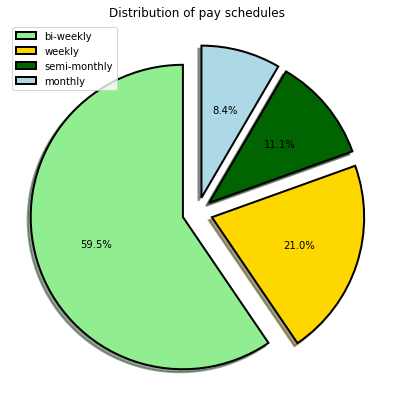

In [76]:
#Distribution of pay_schedule

fig = plt.figure(figsize = (7,7))
colors = ('lightgreen', 'gold', 'darkgreen', 'lightblue')
labels = ('Positive', 'Neutral', 'Negative')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = trainset['pay_schedule'].value_counts()
explode = (0.1, 0.1, 0.1, 0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors,
         startangle = 90, wedgeprops = wp, explode = explode, label = '', labels = None, legend = True)
plt.title('Distribution of pay schedules')
plt.show()

From the distribution of customers payment schedules, 59% of customers opted for bi-weekly mode of payment which happens to be the highest percentage amongst the available payment schedules, With monthly payment schedules being the lowest with 8.4%.

The Semi-monthly payment schedule option is a close alternative to the bi-weekly system but is not as profitable and the earner's side.
The biweekly system get 26 paychecks in a year **(2.166 times approx a month)** while the semiweekly system pays 24 times in year **(2 times a month)**. Hence is might explain why there are more biweekly employee tham their semiweekly conterparts

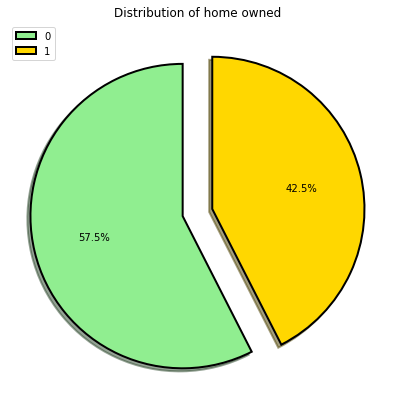

In [8]:
#Distribution of home owner

fig = plt.figure(figsize = (7,7))
colors = ('lightgreen', 'gold')
labels = ('Positive', 'Neutral', 'Negative')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = trainset['home_owner'].value_counts()
explode = (0.1,0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors,
         startangle = 90, wedgeprops = wp, explode = explode, label = '', labels = None, legend = True)
plt.title('Distribution of home owned')
plt.show()

**(Key | 0 : no home, 1 : own home)**

From the distribution, The ratio of the home owners of the customers are not far off although customers with homes are more.

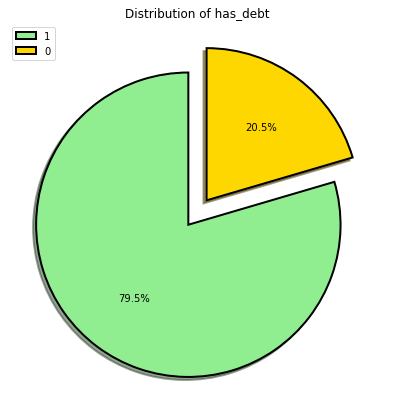

In [9]:
#Distribution of has_debt

fig = plt.figure(figsize = (7,7))
colors = ('lightgreen', 'gold')
labels = ('Positive', 'Neutral', 'Negative')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = trainset['has_debt'].value_counts()
explode = (0.1,0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors,
         startangle = 90, wedgeprops = wp, explode = explode, label = '', labels = None, legend = True)
plt.title('Distribution of has_debt')
plt.show()

(Key | 0 : no debt, 1 : has debt)

From the distribution, A lot of Borrowme's customers are in debted.

## Exploration of Continous Features

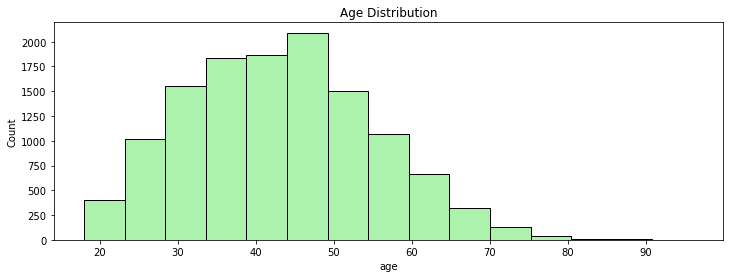

In [11]:
plt.figure(figsize = (12,4))
ax = sns.histplot(trainset['age'], bins = 15, color = 'lightgreen')
plt.title("Age Distribution")
plt.show()

It can be denoted from the histogram chart above that Borrowme's customers are majorly between the age of **30 and 55**. With fewer old aged customers. The age column is skewed to the left

### Data Transformation
From description, some of the features need a little bit of Engineering to get the best insights.
* Collaspe *month_employed and year_employed to *time_employed**
* Collaspe *personal_m and personal_y to *acct_time**
* Normalize *risk_score*

In [12]:
#convert month_employed to year and add to year_employed
trainset["time_employed"] = trainset.years_employed +(trainset.months_employed/12)
trainset.drop(["years_employed","months_employed"],axis = 1, inplace=True)

#convert personal_account_m to year and add to personal_account_y
trainset["acct_time"] = trainset.personal_account_y +(trainset.personal_account_m/12)
trainset.drop(["personal_account_y","personal_account_m"],axis = 1, inplace=True)

#Normalize risk_score
trainset["risk_score"] = (trainset.risk_score/100000)

**Let's make plots to show the relatonships of certian features**

In [13]:
trainset.head()

,Entry_id,age,pay_schedule,home_owner,income,current_address_year,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,time_employed,acct_time
0,7629673,40,bi-weekly,1,3135,3,1,550,0.3620,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,3.0,2.500000
1,5335819,33,semi-monthly,0,3590,2,1,1100,0.5385,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,5.0,8.166667
2,8492423,21,weekly,0,2303,8,1,600,0.7485,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,5.0,7.166667
3,7948313,26,bi-weekly,0,2795,4,1,800,0.5080,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,4.0,6.083333
4,4297036,43,bi-weekly,0,5000,1,1,1100,0.6910,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,2.0,2.083333


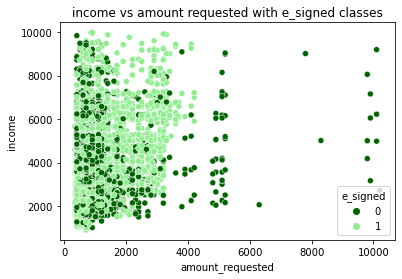

In [75]:
sns.scatterplot(data = trainset, x = "amount_requested", y = "income", hue = "e_signed", palette = ["darkgreen", "lightgreen"])
plt.title("income vs amount requested with e_signed classes")
plt.show()

As suspected from the Data Evaluation phase, **amount_requested** seem to have outliers which will affect the health of the data and will inturn affect the model.

No strong correlation is displayed but alot of the customers who complete the e_signing process do not have high amount requested, A lot of the high requested amounts are incomplete e-processes

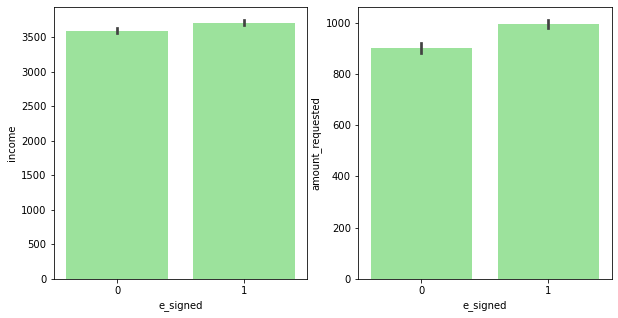

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(x='e_signed', y='income', data=trainset, ax=ax[0], color = "lightgreen")
sns.barplot(x='e_signed', y='amount_requested', data=trainset, ax=ax[1], color = "lightgreen")
plt.show()

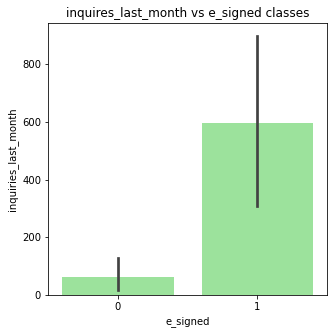

In [64]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(x='e_signed', y=trainset['inquiries_last_month'].value_counts(), data=trainset, color = "lightgreen");
plt.title("inquires_last_month vs e_signed classes")
plt.show()

In [17]:
trainset.inquiries_last_month.max()

30

More inquiries were made by customers that followed through with the e-signing process with a 30 as the max complaints lodged by one individual

In [18]:
# total number of individuals e_signed
signed = trainset.e_signed.value_counts()
signed

1    6766
0    5750
Name: e_signed, dtype: int64

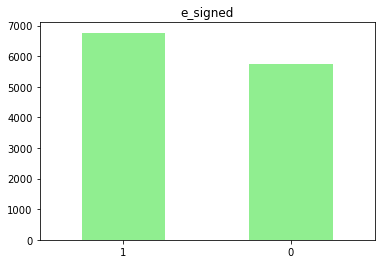

In [65]:
signed.plot(kind ='bar', color = 'lightgreen')
plt.xticks(rotation=360)
plt.title("e_signed")
plt.show()

More than 6,766 customers used the e-signing process which is more than half of the total customer records

<AxesSubplot:xlabel='age'>

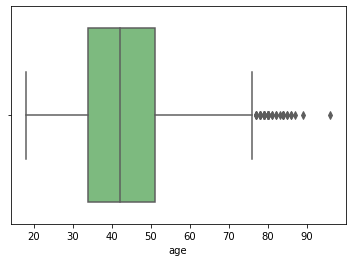

In [83]:
sns.boxplot(data=trainset, x="age", palette = "Greens")

<AxesSubplot:xlabel='income'>

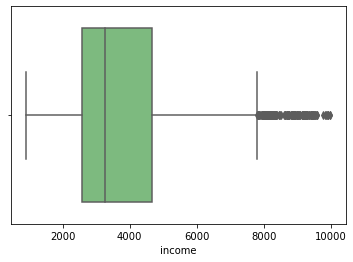

In [84]:
sns.boxplot(data=trainset, x="income", palette = "Greens")

<AxesSubplot:xlabel='amount_requested'>

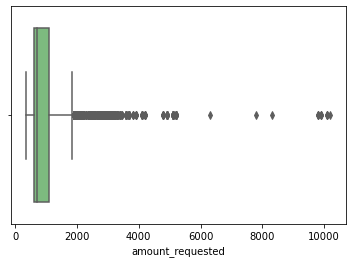

In [85]:
sns.boxplot(data=trainset, x="amount_requested", palette = "Greens")

<AxesSubplot:xlabel='inquiries_last_month'>

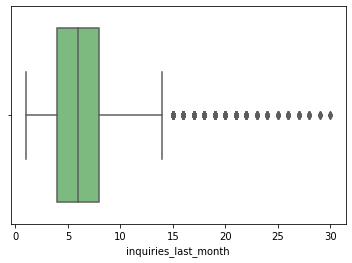

In [86]:
sns.boxplot(data=trainset, x="inquiries_last_month", palette = "Greens")

From the boxplot analyses above, there are evidence of outliers in the dataset.

In [29]:
trainset_corr_risk = trainset[['risk_score', 'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5', 'ext_quality_score','ext_quality_score_2', 'e_signed']].corr()
trainset_corr_risk

,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,e_signed
risk_score,1.000000,0.213145,0.099622,0.115621,0.130006,0.103552,0.106679,0.082468
risk_score_2,0.213145,1.000000,0.183195,0.224979,0.229172,0.210772,0.198172,0.010032
risk_score_3,0.099622,0.183195,1.000000,0.163886,0.478213,0.257891,0.265341,-0.028525
risk_score_4,0.115621,0.224979,0.163886,1.000000,0.585909,0.248139,0.234005,0.007270
risk_score_5,0.130006,0.229172,0.478213,0.585909,1.000000,0.291352,0.282420,-0.005864
ext_quality_score,0.103552,0.210772,0.257891,0.248139,0.291352,1.000000,0.362358,-0.029381
ext_quality_score_2,0.106679,0.198172,0.265341,0.234005,0.282420,0.362358,1.000000,-0.021148
e_signed,0.082468,0.010032,-0.028525,0.007270,-0.005864,-0.029381,-0.021148,1.000000


Text(0.5, 1.0, 'trainse_corr_risk')

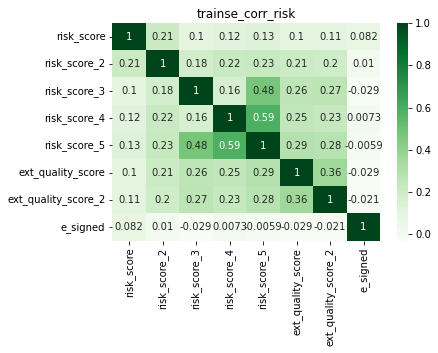

In [50]:
sns.heatmap(trainset_corr_risk, annot = True, cmap = "Greens")
plt.title("trainse_corr_risk")

From the HeatMap above, it is evident that there is a weak corrlation between the customer risk_scores and ext_quality_scores columns, and the e-signing process.

### Data Analysis Report
##### From the data analysis we can see that:

* Some of the columns similar orientation which prompts our use of features engineering to engineer new columns using features addition.
* The data has outliers which provokes our use of IQR (Interquantile range) to filter out the outliers across the dataset.
* Some of the features especially the customer risk scores and ext quality scores have little correlation to the e-signing process. To this effect, we employ the use of a gradient boosting algorithm to improve the performance of the model and punish under-performing features. 

In [24]:
one_hot_encoding = pd.get_dummies (trainset["pay_schedule"])
trainset = pd.concat([one_hot_encoding, trainset], axis = 1)
trainset= trainset.drop(["pay_schedule"], axis = 1)
trainset.head()

,bi-weekly,monthly,semi-monthly,weekly,Entry_id,age,home_owner,income,current_address_year,has_debt,...,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed,time_employed,acct_time
0,1,0,0,0,7629673,40,1,3135,3,1,...,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1,3.0,2.500000
1,0,0,1,0,5335819,33,0,3590,2,1,...,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0,5.0,8.166667
2,0,0,0,1,8492423,21,0,2303,8,1,...,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1,5.0,7.166667
3,1,0,0,0,7948313,26,0,2795,4,1,...,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1,4.0,6.083333
4,1,0,0,0,4297036,43,0,5000,1,1,...,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1,2.0,2.083333


We use One-Hot Encoding to transform categorical column : "pay_schedule" to a numerical colummn for model fitting.

In [25]:
features = ["age","income","amount_requested","inquiries_last_month"]

for feature in features:
    Q1 = trainset[feature].quantile(0.25)
    Q3 = trainset[feature].quantile(0.75)

    IQR = Q3-Q1

    max_thr = Q3 + 1.5*IQR
    min_thr = Q1 - 1.5*IQR
    
    trainset = trainset[(trainset[feature]<max_thr)  & (trainset[feature]>min_thr)]

Taking insights from the scatter-plots analyses above, the inter-quantile range is used to remove outliers in columns: ["age","income","amount_requested","inquiries_last_month" ] above the maximum threashold and below minimum threashold.

In [26]:
trainset.drop("Entry_id", axis = 1, inplace = True)
X = trainset.drop("e_signed", axis = 1)
y = trainset["e_signed"]

The trainset dataset is splitted into X and y. X is the dataset containing the independent features used to predict our target column. y is the dataset containing out target column : "e_signed"

In [36]:
!pip install XGBoost

In [33]:
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [39]:
from xgboost import XGBClassifier

In [ ]:
from xgboost import XGBClassifier

def hyperParameterTuning(X, y):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'roc_auc',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

We run hyperparameter tuning for our model and the results of the is shown below

In [47]:
 param = {'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

xgb_model = XGBClassifier(scoring = 'roc_auc',**param)

In [48]:
xgb_model.fit(X,y)
xgb_model.score(X,y)

[07:38:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "scoring" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.8411038899877555

### We run the  same transformation we used for our trainset for our testset

In [42]:
# Add years_employed column to months_employed column and create a new column with the result.
# We also drop the two columns.
testset["time_employed"] = testset.years_employed +(testset.months_employed/12)
testset.drop(["years_employed","months_employed"],axis = 1, inplace=True)

# Add personal_account_y column to personal_account_m column and create a new column with the result.
# We also drop the two columns.
testset["acct_time"] = testset.personal_account_y +(testset.personal_account_m/12)
testset.drop(["personal_account_y","personal_account_m"],axis = 1, inplace=True)

# We divide risk_score by 100000,
testset["risk_score"] = (testset.risk_score/100000)

In [43]:
# We employ one-hot encoding to convert the categorical data to numerical data
one_hot_encoding_2 = pd.get_dummies (testset["pay_schedule"])
testset = pd.concat([one_hot_encoding_2, testset], axis = 1)
testset= testset.drop(["pay_schedule"], axis = 1)
testset.head()

,bi-weekly,monthly,semi-monthly,weekly,Entry_id,age,home_owner,income,current_address_year,has_debt,...,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,time_employed,acct_time
0,0,0,0,1,3560428,61,0,3180,3,1,...,0.3015,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9,6.00,7.166667
1,0,0,0,1,6934997,23,0,1540,0,1,...,0.3455,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7,0.50,1.583333
2,1,0,0,0,5682812,40,0,5230,1,1,...,0.4215,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8,6.00,7.166667
3,0,0,1,0,6493191,32,0,5260,3,1,...,0.6405,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3,0.25,4.083333
4,1,0,0,0,8990111,61,1,3270,0,1,...,0.6170,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7,4.00,3.333333


In [44]:
# We drop the Entry_id from the dataset and pass into another variable.
test = testset.drop("Entry_id", axis = 1)
sub = testset["Entry_id"]

In [45]:
# The trained model is used to predict the probability of our target column using the test data.
test_pred = xgb_model.predict_proba(test)[:,1]

In [46]:
# The result of the prediction is passed into a dataframe.
sub = pd.DataFrame({"Entry_id":testset.Entry_id,"e_signed":test_pred})
sub

,Entry_id,e_signed
0,3560428,0.372645
1,6934997,0.802099
2,5682812,0.543784
3,6493191,0.511851
4,8990111,0.358980
...,...,...
5387,9056719,0.679551
5388,3077109,0.644068
5389,1807355,0.562960
5390,3983229,0.475488


In [ ]:
# The dataframe is saved to a CSV file.
sub.to_csv("submission_file.csv", index=False)